In [ ]:
#import library
import pandas as pd #library untuk manipulasi data
import numpy as np #library untuk operasi numerik di Python
import matplotlib.pyplot as plt #library untuk membuat visualisasi

from tensorflow.keras.preprocessing.text import Tokenizer #dipergunakan untuk membuat kamus per kata yang ada dalam kalimat
from tensorflow.keras.preprocessing.sequence import pad_sequences #pad_sequences dipergunakan untuk menambahkan padding

#mengimpor kelas sequential dari library Keras
from keras.models import Sequential
from keras.layers import Dense, GRU, TimeDistributed

In [ ]:
#Membaca file dalam format fixed-width
bhs_x = pd.read_fwf('/content/bahasa_uh.txt', header=None, delimiter='\t').values[:,0]
bhs_y = pd.read_fwf('/content/bahasa_ah.txt', header=None, delimiter='\t').values[:,0]

In [ ]:
bhs_x[0]

'ih uh eh ah ah uh uh ah oh uh eh oh oh oh eh ih eh ih uh eh'

In [ ]:
bhs_y[0]

'ih uh eh ah ahh uhh uhhh ahhh oh uhhhh ehh ohh ohhh ohhhh ehhh ihh ehhhh ihhh uhhhhh ehhhhh'

In [ ]:
#membangun kamus bahasa "uh"
token_uh = Tokenizer() #untuk membuat kamus per kata dari data bahasa "uh"
token_uh.fit_on_texts(bhs_x) #mengajarkan Tokenizer untuk mengenali kata-kata yang muncul dalam bhs_x
kosakata_x = len(token_uh.word_index) #menyimpan jumlah kata unik dalam kamus yang telah dibangun

#mengonversi teks "uh" ke dalam representasi numerik
v_bhs_x = token_uh.texts_to_sequences(bhs_x) #mengonversi setiap kata dalam bhs_x menjadi bilangan bulat berdasarkan kamus yang telah dibangun
v_bhs_x = pad_sequences(v_bhs_x, maxlen=20, padding='post') #menambahkan padding pada urutan sehingga memiliki panjang max 20, dengan padding ditambahkan di bagian belakang
v_bhs_x = v_bhs_x.reshape(v_bhs_x.shape[0], v_bhs_x.shape[1], 1) #mengubah bentuk data agar sesuai untuk dimasukkan ke dalam model RNN

#membangun kamus bahasa "ah"
token_ah = Tokenizer() #untuk membuat kamus per kata dari data bahasa "ah"
token_ah.fit_on_texts(bhs_y) #mengajarkan Tokenizer untuk mengenali kata-kata yang muncul dalam bhs_y
kosakata_y = len(token_ah.word_index) #menyimpan jumlah kata unik dalam kamus yang telah dibangun

#mengonversi teks "ah" ke dalam representasi numerik
v_bhs_y = token_ah.texts_to_sequences(bhs_y) #mengonversi setiap kata dalam bhs_y menjadi bilangan bulat berdasarkan kamus yang telah dibangun
v_bhs_y = pad_sequences(v_bhs_y, maxlen=20, padding='post') #menambahkan padding pada urutan sehingga memiliki panjang max 20, dengan padding ditambahkan di bagian belakang
v_bhs_y = v_bhs_y.reshape(v_bhs_y.shape[0], v_bhs_y.shape[1], 1) #mengubah bentuk data agar sesuai untuk dimasukkan ke dalam model RNN.

In [ ]:
token_uh.word_index

{'uh': 1, 'eh': 2, 'oh': 3, 'ih': 4, 'ah': 5}

In [ ]:
model = Sequential() #membuat model jaringan saraf dengan tipe sequential

model.add(GRU(32, input_shape=v_bhs_x.shape[1:], return_sequences=True)) #menambahkan lapisan GRU dengan 32 unit sel
model.add(TimeDistributed(Dense(64, activation='relu'))) #menambahkan lapisan waktu terdistribusi (TimeDistributed) dan lapisan dense
model.add(TimeDistributed(Dense(kosakata_y+1, activation='softmax'))) #menambahkan lapisan dense terdistribusi untuk output

#mengompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 20, 32)            3360      
                                                                 
 time_distributed_2 (TimeDi  (None, 20, 64)            2112      
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 20, 58)            3770      
 stributed)                                                      
                                                                 
Total params: 9242 (36.10 KB)
Trainable params: 9242 (36.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(v_bhs_x, v_bhs_y, batch_size=1, epochs=10, validation_split=0.2)

Epoch 1/10
8000/8000 [==============================] - 50s 6ms/step - loss: 1.2196 - accuracy: 0.5280 - val_loss: 0.7429 - val_accuracy: 0.7190
Epoch 2/10
8000/8000 [==============================] - 46s 6ms/step - loss: 0.5356 - accuracy: 0.8069 - val_loss: 0.2989 - val_accuracy: 0.9205
Epoch 3/10
8000/8000 [==============================] - 42s 5ms/step - loss: 0.2129 - accuracy: 0.9434 - val_loss: 0.1422 - val_accuracy: 0.9729
Epoch 4/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.1135 - accuracy: 0.9732 - val_loss: 0.0689 - val_accuracy: 0.9886
Epoch 5/10
8000/8000 [==============================] - 40s 5ms/step - loss: 0.0767 - accuracy: 0.9827 - val_loss: 0.0460 - val_accuracy: 0.9938
Epoch 6/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.0586 - accuracy: 0.9868 - val_loss: 0.0324 - val_accuracy: 0.9936
Epoch 7/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.0487 - accuracy: 0.9889 - val_loss: 0.0244 - val_ac

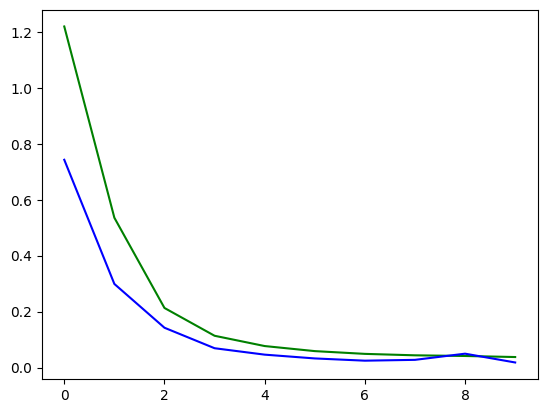

In [ ]:
y1 = history.history['loss']
y2 = history.history['val_loss']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

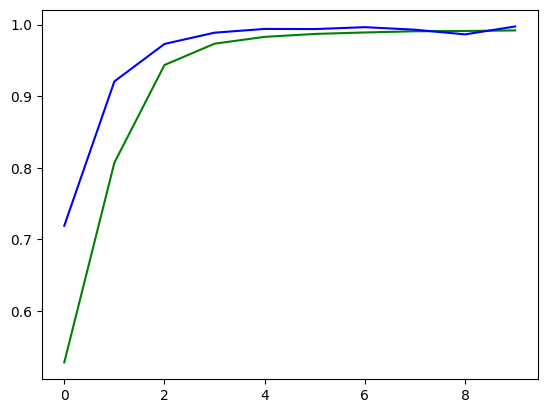

In [ ]:
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

In [ ]:
# Ini adalah fungsi yang merubah probabilitas vektor ke dalam
# angka-angka diskrit yang kemudian dipergunakan sebagai basis
# pencarian kata yang sesuai dengan kamus token

def logits_to_text(logits, tokenizer):
  index_to_words = {id: word for word, id in tokenizer.word_index.items()}
  index_to_words[0] = ''
  return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [ ]:
kalimat_test = ['ih ih eh eh eh uh uh ah oh uh ah oh oh oh ah ih eh ih uh eh']
kalimat_test = token_uh.texts_to_sequences(kalimat_test)
kalimat_test = pad_sequences(kalimat_test, maxlen=20, padding='post')
kalimat_test = kalimat_test.reshape(kalimat_test.shape[0], kalimat_test.shape[1],1)

y_pred = model.predict(kalimat_test)
print(logits_to_text(y_pred[0], token_ah))

1/1 [==============================] - 0s 302ms/step
ih ihh eh ehh ehhh uh uhh ah oh uhhh ahh ohh ohhh ohhhh ahhh ihhh ehhhh ihhhh uhhhh ehhhhh
